In [51]:
# imports
import numpy as np

from data_creation import create_data
from util import read_data, calculate_n_sets, save_ng_result, save_dng_results, read_ng_data, read_ng_test_data, read_dng_data, read_dng_test_data, group_data_by, calculate_route_costs_dmp
from routing import dynamic_ng_pathing, ng_routing
from computational_experiment import test_delta1_for_ng_routing, test_delta1_and_delta2_for_dng_pathing
from classes import SortOption
from visualize import visualize_route, visualize_nodes
from nearest_neighbor import find_nearest_neighbours_path

import matplotlib.pyplot as plt
import shutil
import os
from statistics import mean
from sklearn.linear_model import LinearRegression

In [52]:
path = 'YOUR OUTPUT PATH HERE'

In [53]:
# Choose what the notebook should do
create_new_data = True
clear_exports = True

conduct_nn_routing = True
conduct_ng_routing = True
conduct_dng_pathing = True
conduct_ng_testing = True
conduct_dng_testing = True

In [54]:
# Data Creation Parameters
amount = 15
range_x = 200
range_y = 200

In [55]:
# Hyper Parameters
starting_node = 0
delta1 = 11
delta2 = 14

In [56]:
# Testing Parameters:
iterations_ng = 10
iterations_dng = 1

In [57]:
if os.path.isdir(path + "export"):
    if clear_exports:
        shutil.rmtree(path + "export")

In [58]:
# Data preparation
if create_new_data:
    create_data(amount, range_x, range_y, path)

costs_list, nodes = read_data(path)
node_objects = calculate_n_sets(costs_list, nodes, delta1)
to_visit = list(range(0, len(nodes)))
to_visit.remove(starting_node)

Data generation done


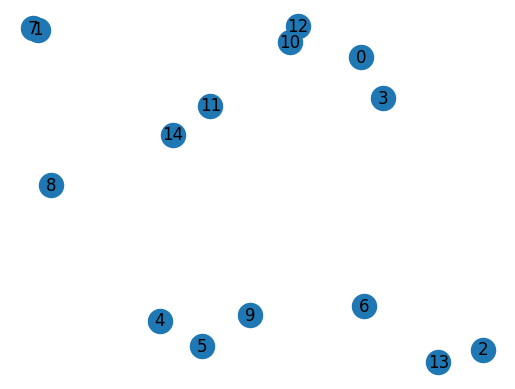

In [59]:
visualize_nodes(nodes)

Nearest Neighbor

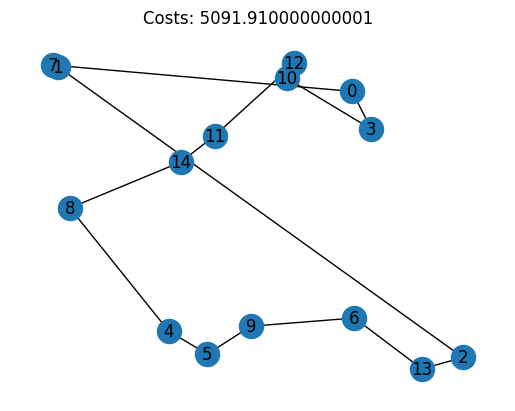

In [60]:
# Generating a solution using a nearest neighbor heuristic to use it as an upper bound
nn_route = find_nearest_neighbours_path(nodes.copy(), costs_list, starting_node)
upper_bound = calculate_route_costs_dmp(nn_route, costs_list)

if conduct_nn_routing:
    visualize_route(nodes, nn_route, calculate_route_costs_dmp(nn_route, costs_list), True, "nn_route", 0, path)

Ng-Routing

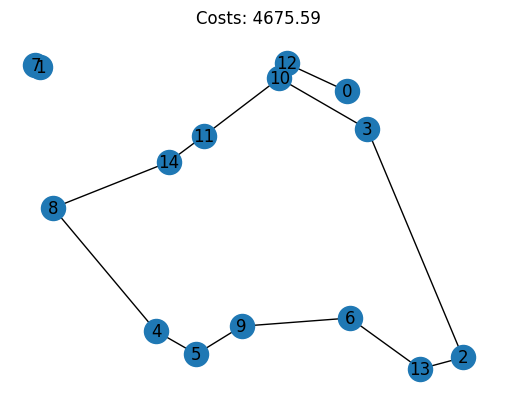

In [61]:
# Conducting a Ng-Route Relaxation with the before set hyperparameters
if conduct_ng_routing:
    save_ng_result(path, ng_routing(starting_node, node_objects.copy(), costs_list, upper_bound))
    ng_data = read_ng_data(path)
    visualize_route(nodes, ng_data.best_route, ng_data.cost, True, "ng_route", 0, path)

Dynamic Ng-Pathing


1. Iteration
[0, 12, 10, 11, 14, 8, 4, 5, 9, 6, 13, 2, 3, 10, 12, 0]
Costs : 4675.59
Sub Routes:
[[10, 11, 14, 8, 4, 5, 9, 6, 13, 2, 3, 10], [12, 10, 11, 14, 8, 4, 5, 9, 6, 13, 2, 3, 10, 12]]

Best Route in iteration: 2
[0, 12, 10, 11, 14, 1, 7, 8, 4, 5, 9, 6, 13, 2, 3, 0]
Costs : 4818.32


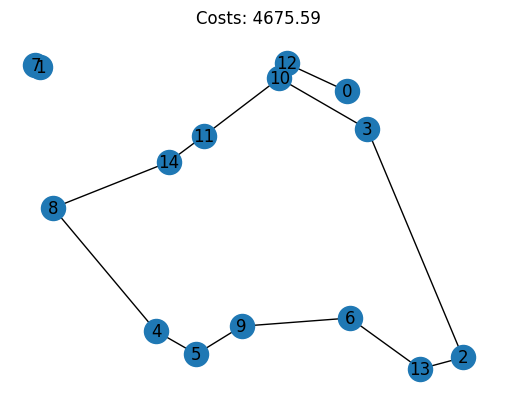

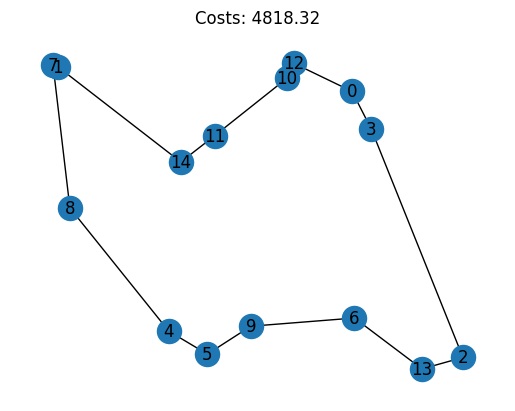

In [62]:
# Conducting a Dynamic Ng-Path Relaxation with the before set hyperparameters
if conduct_dng_pathing:
    dng_result, results = dynamic_ng_pathing(starting_node, node_objects.copy(), costs_list, delta2, upper_bound)
    save_dng_results(path, results)
    dng_data = read_dng_data(path)
    for i in range(0, len(dng_data)):
        plt.figure(i)
        visualize_route(nodes, dng_data[i].best_route, dng_data[i].cost, True, "dng_route_iteration", i + 1, path)

Ng Testing


Data of 20 iterations

Finding Mean Delta1 for permitted solutions
18.45

Finding mean decrease in time for increase in delta1
-4.601



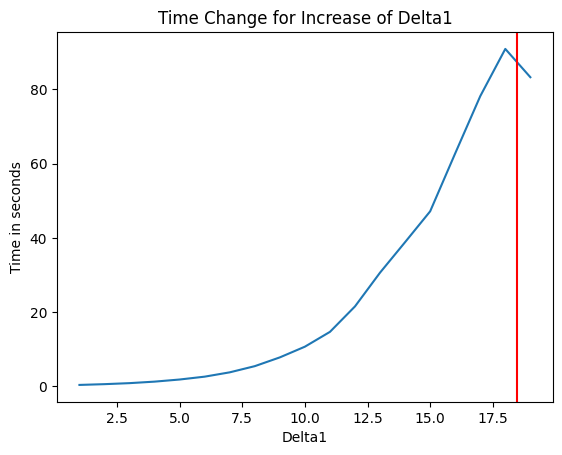

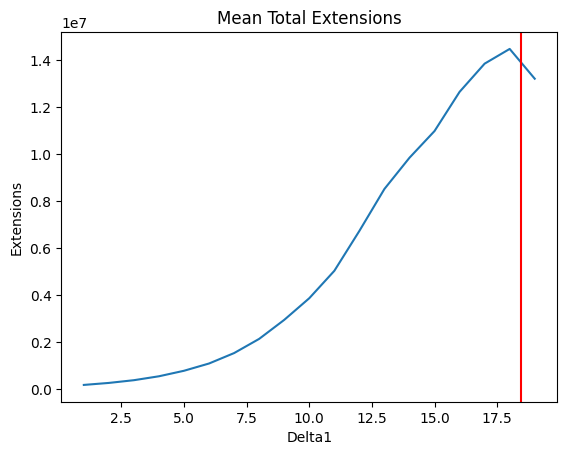

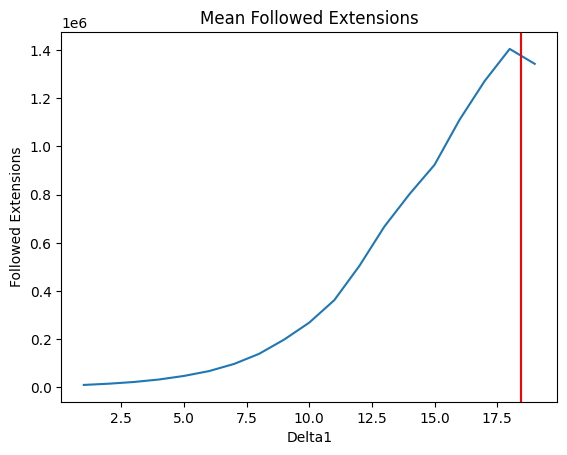

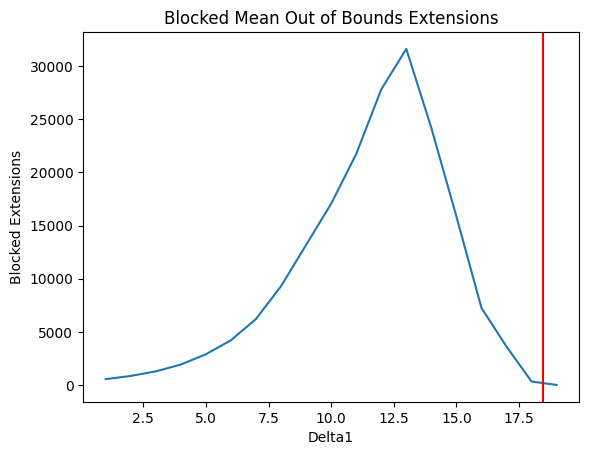

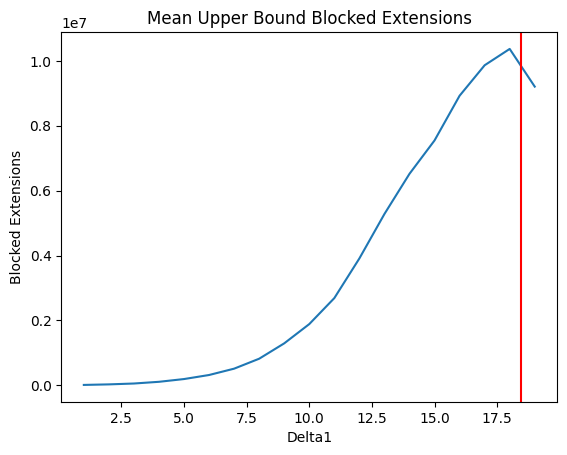

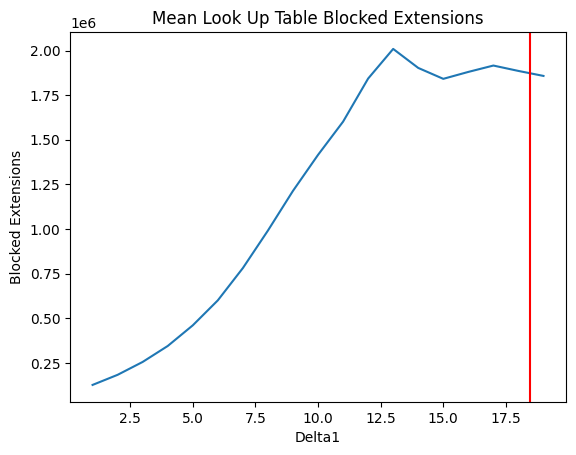

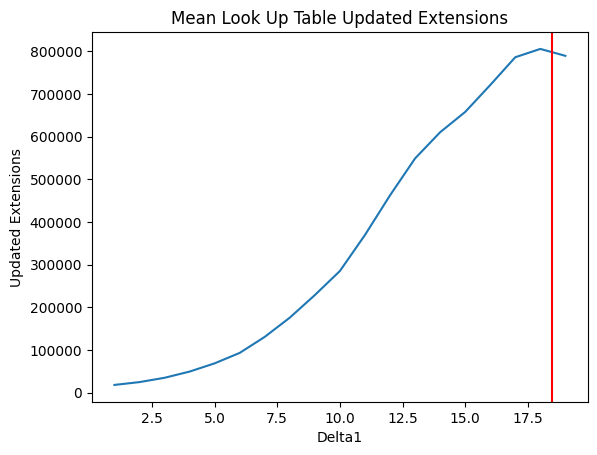

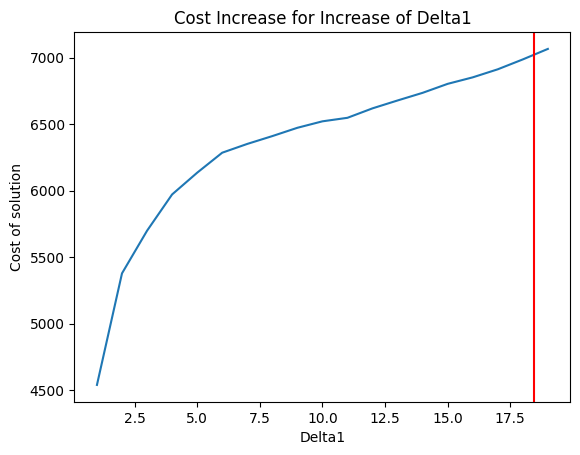

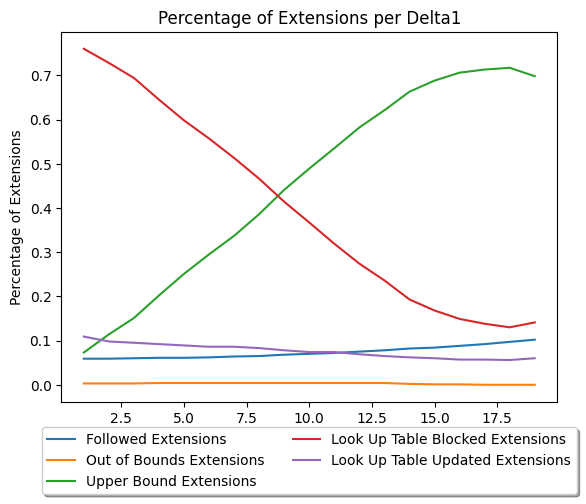

In [63]:
# Conducting Test of Delta1 values for the Ng-Route Relaxation with the before set hyperparameters
if conduct_ng_testing:
    test_delta1_for_ng_routing(path, amount, range_x, range_y, starting_node, iterations_ng, False)
    ng_test_data = read_ng_test_data(path)

    delta1_array = []
    for i in range(len(ng_test_data[0])):
        delta1_array.append(i + 1)

    elementary_delta1 = []
    for result_list in ng_test_data:
        for result in result_list:
            if result.elementary:
                elementary_delta1.append(result.delta1)
                break

    time_difference = []
    for result_list in ng_test_data:
        for i in range(0, len(result_list) - 1):
            time_difference.append(result_list[i].time - result_list[i + 1].time)

    time_per_delta1 = []
    cost_per_delta1 = []
    ext_per_delta1 = []
    followed_ext_per_delta1 = []
    ub_ext_per_delta1 = []
    lut_ext_per_delta1 = []
    oob_ext_per_delta1 = []
    lut_up_per_delta1 = []

    for i in ng_test_data[0]:
        time_per_delta1.append([])
        cost_per_delta1.append([])
        ext_per_delta1.append([])
        ub_ext_per_delta1.append([])
        lut_ext_per_delta1.append([])
        followed_ext_per_delta1.append([])
        oob_ext_per_delta1.append([])
        lut_up_per_delta1.append([])

    for i in range(len(ng_test_data)):
        for j in range(len(ng_test_data[i])):
            time_per_delta1[j].append(ng_test_data[i][j].time)
            cost_per_delta1[j].append(ng_test_data[i][j].cost)
            ext_per_delta1[j].append(ng_test_data[i][j].all_ext)
            ub_ext_per_delta1[j].append(ng_test_data[i][j].ub_ext)
            lut_ext_per_delta1[j].append(ng_test_data[i][j].lut_ext)
            followed_ext_per_delta1[j].append(ng_test_data[i][j].followed_ext)
            oob_ext_per_delta1[j].append(ng_test_data[i][j].oob_ext)
            lut_up_per_delta1[j].append(ng_test_data[i][j].lut_up_ext)

    mean_time_per_delta1 = []
    for array in time_per_delta1:
        mean_time_per_delta1.append(mean(array))

    mean_cost_per_delta1 = []
    for array in cost_per_delta1:
        mean_cost_per_delta1.append(mean(array))

    mean_ext_per_delta1 = []
    for array in ext_per_delta1:
        mean_ext_per_delta1.append(mean(array))

    mean_ub_ext_per_delta1 = []
    for array in ub_ext_per_delta1:
        mean_ub_ext_per_delta1.append(mean(array))

    mean_lut_ext_per_delta1 = []
    for array in lut_ext_per_delta1:
        mean_lut_ext_per_delta1.append(mean(array))

    mean_followed_ext_per_delta1 = []
    for array in followed_ext_per_delta1:
        mean_followed_ext_per_delta1.append(mean(array))

    mean_oob_ext_per_delta1 = []
    for array in oob_ext_per_delta1:
        mean_oob_ext_per_delta1.append(mean(array))

    mean_lut_up_per_delta1 = []
    for array in lut_up_per_delta1:
        mean_lut_up_per_delta1.append(mean(array))

    print()
    print("Data of " + str(len(ng_test_data)) + " iterations")

    print()
    print("Finding Mean Delta1 for permitted solutions")
    print(round(mean(elementary_delta1), 3))
    print()

    print("Finding mean decrease in time for increase in delta1")
    print(round(mean(time_difference), 3))
    print()

    plt.figure(1)
    plt.title("Time Change for Increase of Delta1")
    plt.plot(delta1_array, mean_time_per_delta1)
    plt.ylabel('Time in seconds')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(2)
    plt.title("Mean Total Extensions")
    plt.plot(delta1_array, mean_ext_per_delta1)
    plt.ylabel('Extensions')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(3)
    plt.title("Mean Followed Extensions")
    plt.plot(delta1_array, mean_followed_ext_per_delta1)
    plt.ylabel('Followed Extensions')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(4)
    plt.title("Blocked Mean Out of Bounds Extensions")
    plt.plot(delta1_array, mean_oob_ext_per_delta1)
    plt.ylabel('Blocked Extensions')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(5)
    plt.title("Mean Upper Bound Blocked Extensions")
    plt.plot(delta1_array, mean_ub_ext_per_delta1)
    plt.ylabel('Blocked Extensions')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(6)
    plt.title("Mean Look Up Table Blocked Extensions")
    plt.plot(delta1_array, mean_lut_ext_per_delta1)
    plt.ylabel('Blocked Extensions')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(6)
    plt.title("Mean Look Up Table Updated Extensions")
    plt.plot(delta1_array, mean_lut_up_per_delta1)
    plt.ylabel('Updated Extensions')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    plt.figure(7)
    plt.title("Cost Increase for Increase of Delta1")
    plt.plot(delta1_array, mean_cost_per_delta1)
    plt.ylabel('Cost of solution')
    plt.xlabel('Delta1')
    plt.axvline(x=round(mean(elementary_delta1), 3), color='r')
    plt.show()

    followed_percent = []
    oob_percent = []
    ub_percent = []
    lut_percent = []
    lut_up_percent = []
    for i in range(len(delta1_array)):
        followed_percent.append(round(mean_followed_ext_per_delta1[i]/mean_ext_per_delta1[i], 3))
        oob_percent.append(round(mean_oob_ext_per_delta1[i]/mean_ext_per_delta1[i], 3))
        ub_percent.append(round(mean_ub_ext_per_delta1[i]/mean_ext_per_delta1[i], 3))
        lut_percent.append(round(mean_lut_ext_per_delta1[i]/mean_ext_per_delta1[i], 3))
        lut_up_percent.append(round(mean_lut_up_per_delta1[i]/mean_ext_per_delta1[i], 3))

    plt.figure(18)
    plt.title("Percentage of Extensions per Delta1")
    plt.plot(delta1_array, followed_percent, label='Followed Extensions')
    plt.plot(delta1_array, oob_percent, label='Out of Bounds Extensions')
    plt.plot(delta1_array, ub_percent, label='Upper Bound Extensions')
    plt.plot(delta1_array, lut_percent, label='Look Up Table Blocked Extensions')
    plt.plot(delta1_array, lut_up_percent, label='Look Up Table Updated Extensions')
    plt.ylabel('Percentage of Extensions')
    plt.xlabel('delta1')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
    plt.show()


Dng Testing

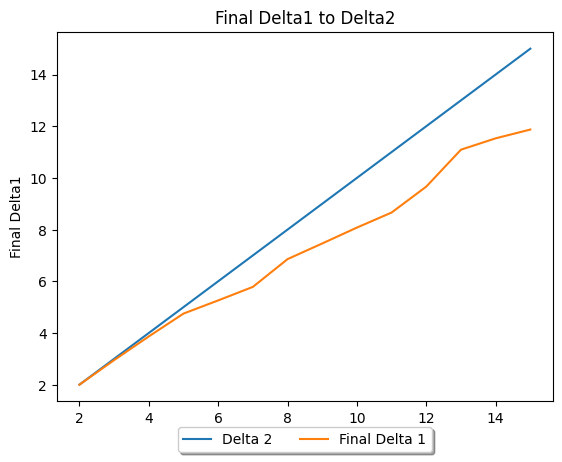

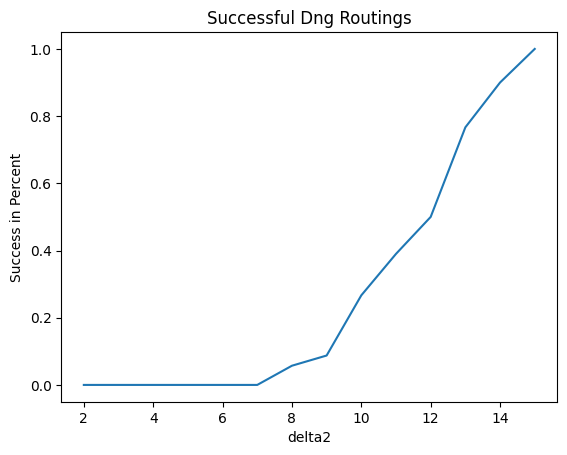

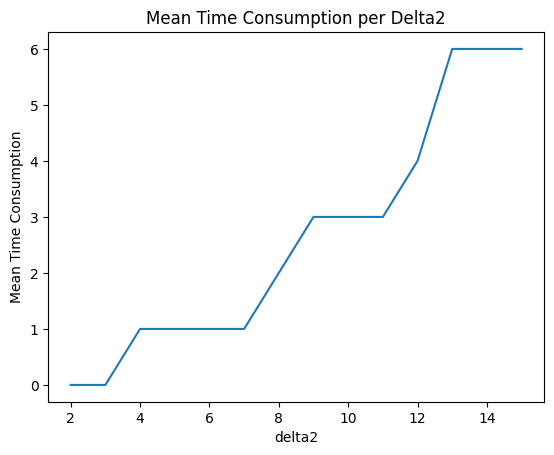

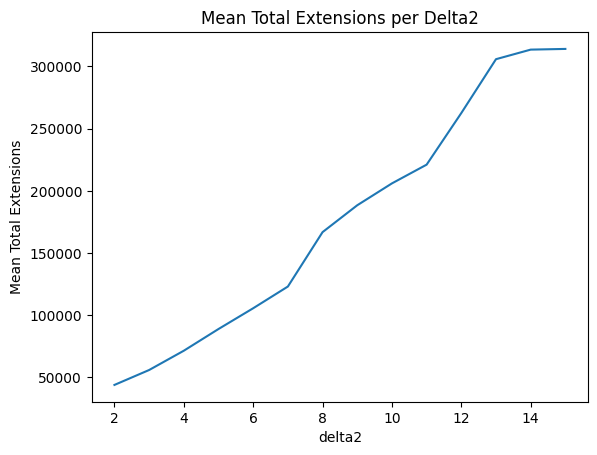

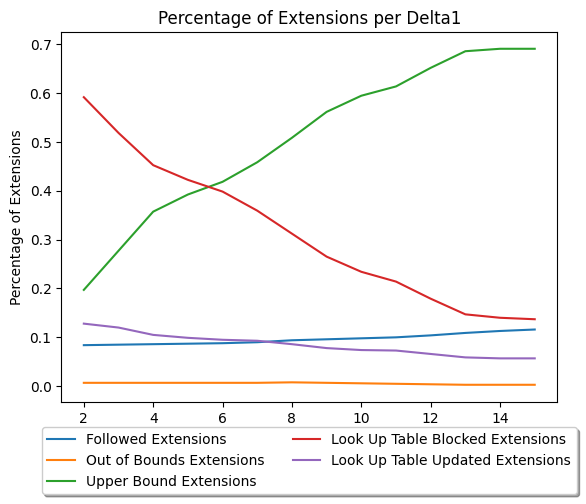

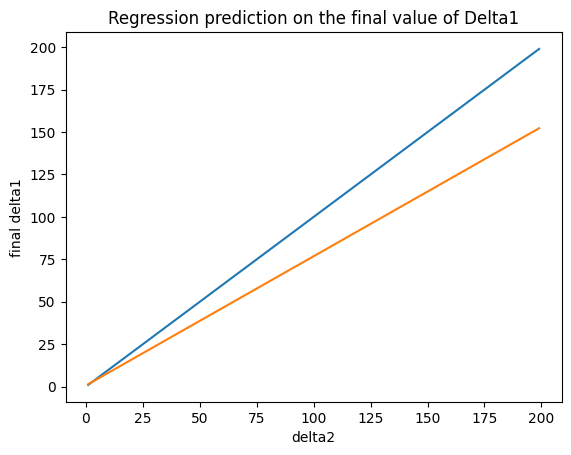

In [64]:
if conduct_dng_testing:
    test_delta1_and_delta2_for_dng_pathing(path, amount, range_x, range_y, starting_node, iterations_dng)
    dng_test_data = read_dng_test_data(path)

    all_test_data = []
    for document in dng_test_data:
        all_test_data.extend(document)

    sorted_delta2 = group_data_by(all_test_data, SortOption.delta2)
    elementary, not_elementary = group_data_by(all_test_data, SortOption.elementary)
    sorted_start_delta1 = group_data_by(all_test_data, SortOption.start_delta1)
    sorted_final_delta1 = group_data_by(all_test_data, SortOption.final_delta1)
    exceeded, not_exceeded = group_data_by(all_test_data, SortOption.exceeded)

    delta2_array = []
    for i in range(len(sorted_delta2)):
        delta2_array.append(i + 2)

    mean_time_per_delta2 = []
    mean_final_delta1_per_delta2 = []
    mean_ub_ext_per_delta2 = []
    mean_oob_ext_per_delta2 = []
    mean_lut_up_per_delta2 = []
    mean_lut_ext_per_delta2 = []
    mean_followed_ext_per_delta2 = []
    mean_total_extensions_per_delta2 = []
    mean_cost_per_delta2 = []
    for delta2_list in sorted_delta2:
        time = []
        final_delta1 = []
        ub_ext = []
        total_ext = []
        oob_ext = []
        lut = []
        lut_up = []
        followed = []
        cost = []
        for item in delta2_list:
            time.append(item.time)
            final_delta1.append(item.final_delta1)
            ub_ext.append(item.ub_ext)
            total_ext.append(item.all_ext)
            oob_ext.append(item.oob_ext)
            lut.append(item.lut_ext)
            lut_up.append(item.lut_up_ext)
            followed.append(item.followed_ext)
            cost.append(item.cost)
        mean_time_per_delta2.append(round(mean(time)))
        mean_final_delta1_per_delta2.append(round(mean(final_delta1), 3))
        mean_ub_ext_per_delta2.append(round(mean(ub_ext), 3))
        mean_total_extensions_per_delta2.append(round(mean(total_ext), 3))
        mean_oob_ext_per_delta2.append(round(mean(oob_ext), 3))
        mean_lut_up_per_delta2.append(round(mean(lut_up), 3))
        mean_lut_ext_per_delta2.append(round(mean(lut), 3))
        mean_followed_ext_per_delta2.append(round(mean(followed), 3))
        mean_cost_per_delta2.append(round(mean(cost), 3))

    all_final_delta1 = []
    for item in elementary:
        all_final_delta1.append(item.final_delta1)
    mean_final_delta1 = round(mean(all_final_delta1), 3)

    success_percent_per_delta2 = []
    for delta2_list in sorted_delta2:
        suc = 0
        for item in delta2_list:
            if item.elementary:
                suc += 1
        percent = suc / len(delta2_list)
        success_percent_per_delta2.append(percent)

    plt.figure(5)
    plt.title("Final Delta1 to Delta2")
    plt.plot(delta2_array, delta2_array, label='Delta 2')
    plt.plot(delta2_array, mean_final_delta1_per_delta2, label='Final Delta 1')
    plt.ylabel('Final Delta1')
    plt.xlabel('delta2')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
    plt.show()

    plt.figure(4)
    plt.title("Successful Dng Routings")
    plt.plot(delta2_array, success_percent_per_delta2)
    plt.ylabel('Success in Percent')
    plt.xlabel('delta2')
    plt.show()

    plt.figure(2)
    plt.title("Mean Time Consumption per Delta2")
    plt.plot(delta2_array, mean_time_per_delta2)
    plt.ylabel('Mean Time Consumption')
    plt.xlabel('delta2')
    plt.show()

    plt.figure(7)
    plt.title("Mean Total Extensions per Delta2")
    plt.plot(delta2_array, mean_total_extensions_per_delta2)
    plt.ylabel('Mean Total Extensions')
    plt.xlabel('delta2')
    plt.show()

    followed_percent = []
    oob_percent = []
    ub_percent = []
    lut_percent = []
    lut_up_percent = []
    for i in range(len(delta2_array)):
        followed_percent.append(round(mean_followed_ext_per_delta2[i]/mean_total_extensions_per_delta2[i], 3))
        oob_percent.append(round(mean_oob_ext_per_delta2[i]/mean_total_extensions_per_delta2[i], 3))
        ub_percent.append(round(mean_ub_ext_per_delta2[i]/mean_total_extensions_per_delta2[i], 3))
        lut_percent.append(round(mean_lut_ext_per_delta2[i]/mean_total_extensions_per_delta2[i], 3))
        lut_up_percent.append(round(mean_lut_up_per_delta2[i]/mean_total_extensions_per_delta2[i], 3))

    plt.figure(18)
    plt.title("Percentage of Extensions per Delta1")
    plt.plot(delta2_array, followed_percent, label='Followed Extensions')
    plt.plot(delta2_array, oob_percent, label='Out of Bounds Extensions')
    plt.plot(delta2_array, ub_percent, label='Upper Bound Extensions')
    plt.plot(delta2_array, lut_percent, label='Look Up Table Blocked Extensions')
    plt.plot(delta2_array, lut_up_percent, label='Look Up Table Updated Extensions')
    plt.ylabel('Percentage of Extensions')
    plt.xlabel('delta1')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
    plt.show()

    # Regression
    mean_delta_1_numpy = np.array(mean_final_delta1_per_delta2)
    delta_2_array_numpy = np.array(delta2_array).reshape((-1, 1))

    model = LinearRegression()
    model.fit(delta_2_array_numpy, mean_delta_1_numpy)

    prediction_values = []
    for i in range(1, 200):
        prediction_values.append(i)

    prediction_values = np.array(prediction_values).reshape(-1, 1)
    y_pred = model.predict(prediction_values)

    plt.figure(5)
    plt.title("Regression prediction on the final value of Delta1")
    plt.plot(prediction_values, prediction_values)
    plt.plot(prediction_values, y_pred)
    plt.ylabel('final delta1')
    plt.xlabel('delta2')
    plt.show()